In [1]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.manifold import TSNE
import warnings

# 1

In [2]:
a = [i for i in range(100)]
b = [np.e **i for i in a]

print('Pearsonr:', pearsonr(a, b)[0])
print('Spearmanr: ', spearmanr(a, b)[0])

Pearsonr: 0.2520320339038703
Spearmanr:  0.9999999999999999


# 2 

In [3]:
a = [(-1)**i for i in range(100)]
b = np.linspace(2.0, 1.0, 100).tolist()
a.append(10000)
b.append(10000)

print('Pearsonr:', pearsonr(a, b)[0])
print('Spearmanr: ', spearmanr(a, b)[0])

Pearsonr: 0.999999457155795
Spearmanr:  0.0505250353197329


# 3 

In [4]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/healthy_breast.tsv'
df = pd.read_csv(path, index_col = 0, sep = '\t')
df.head()

,TCGA-A7-A0CE-11A,TCGA-A7-A0CH-11A,TCGA-A7-A0D9-11A,TCGA-A7-A13F-11A,TCGA-A7-A13G-11A,TCGA-AC-A23H-11A,TCGA-AC-A2FB-11A,TCGA-AC-A2FF-11A,TCGA-AC-A2FM-11B,TCGA-BH-A0AU-11A,...,TCGA-E9-A1NG-11A,TCGA-E9-A1R7-11A,TCGA-E9-A1RB-11A,TCGA-E9-A1RC-11A,TCGA-E9-A1RD-11A,TCGA-E9-A1RF-11A,TCGA-E9-A1RH-11A,TCGA-E9-A1RI-11A,TCGA-GI-A2C8-11A,TCGA-GI-A2C9-11A
A1BG,0.122859,0.142719,0.042942,0.130964,0.026263,0.146388,0.082280,0.169078,0.266636,0.251960,...,0.029973,0.044415,0.089002,0.030335,0.068472,0.063510,0.048162,0.072965,0.043065,0.180766
A1BG-AS1,1.049671,0.882241,0.372585,1.030442,0.299306,0.828991,0.938558,1.132839,1.362363,1.040175,...,0.581896,0.633134,0.682816,0.307689,0.684830,0.193389,0.400497,0.322244,0.148803,0.870311
A2M,8.090392,7.885307,8.544928,7.791441,8.407390,8.071708,8.322183,7.969582,7.356572,7.228970,...,8.138232,8.417611,7.864779,8.407556,8.140207,8.332565,8.417941,7.895748,7.544923,7.688153
A2M-AS1,0.665384,1.282487,1.631419,1.640940,2.238244,1.437999,1.298605,0.999888,0.838636,0.855256,...,1.341770,1.557140,1.437071,2.312896,1.698707,1.695556,1.498628,2.321666,1.786751,0.531282
A2ML1,0.261259,0.314423,0.369251,0.143067,0.070918,0.384080,0.170179,0.211175,0.055803,0.053366,...,0.076830,0.176132,0.190882,0.106923,0.069723,0.073296,0.124918,0.131874,0.035528,0.185603


In [5]:
corr = np.asarray([spearmanr(df.loc['SPI1'], df.loc[gene]) for gene in df.index])
df['sp'] = corr[:, 0]
df['p-value'] = corr[:, 1]

res = df.loc[(df['sp'].abs() > 0.8) & (df['p-value'] < 0.05)].copy()

In [6]:
res.index

Index(['ADAP2', 'AIF1', 'ALOX5AP', 'ARHGAP30', 'ARPC1B', 'ARRB2', 'C19orf38',
       'C1QA', 'C1QB', 'C1QC', 'C3AR1', 'CCR1', 'CD14', 'CD300A', 'CD300C',
       'CD300LB', 'CD33', 'CD4', 'CD74', 'CD86', 'CFP', 'CLEC10A', 'CORO7',
       'COTL1', 'CRYBB1', 'CSF1R', 'CTSB', 'CYTH4', 'DOK2', 'DOK3', 'FCER1G',
       'FERMT3', 'FGD2', 'FGR', 'FMNL1', 'GPSM3', 'HAVCR2', 'HCK', 'HCLS1',
       'HCST', 'HK3', 'HLA-DMB', 'IL10RA', 'IRF5', 'ITGAM', 'ITGB2', 'KCNAB2',
       'LAPTM5', 'LGALS9', 'LILRA5', 'LILRA6', 'LILRB1', 'LILRB2', 'LILRB3',
       'LILRB4', 'LINC01272', 'LRRC25', 'LYL1', 'MILR1', 'MYO1F', 'NCF1',
       'NCF1B', 'NCF1C', 'NCF2', 'NCF4', 'NCKAP1L', 'NFAM1', 'P2RY6', 'PARVG',
       'PIK3R5', 'PLEK', 'PTAFR', 'SELPLG', 'SIGLEC7', 'SIGLEC9', 'SIRPB2',
       'SLC11A1', 'SLC15A3', 'SLC37A2', 'SLC7A7', 'SPI1', 'TBXAS1', 'TGFB1',
       'THEMIS2', 'TNFAIP8L2', 'TYROBP', 'VAV1', 'WAS'],
      dtype='object')

# 4 

In [7]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/BRCA_pam50.tsv'
df = pd.read_csv(path, index_col = 0, sep = '\t')
df.head()

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A


In [8]:
df = df.melt(id_vars=['Subtype'],
             value_vars=['ESR1', 'PGR', 'ERBB2', 'MKI67'], value_name='Expression',
             var_name='Gene', ignore_index=False)
df

,Subtype,Gene,Expression
TCGA-A1-A0SB-01A,Normal-like,ESR1,2.021223
TCGA-A1-A0SD-01A,Luminal A,ESR1,5.222817
TCGA-A1-A0SE-01A,Luminal A,ESR1,4.191467
TCGA-A1-A0SF-01A,Luminal A,ESR1,4.821377
TCGA-A1-A0SG-01A,Luminal A,ESR1,6.017923
...,...,...,...
TCGA-BH-A0BV-11A,Healthy,MKI67,1.752054
TCGA-BH-A0BC-11A,Healthy,MKI67,0.999218
TCGA-BH-A0DD-11A,Healthy,MKI67,0.812024
TCGA-BH-A0DH-11A,Healthy,MKI67,0.375275


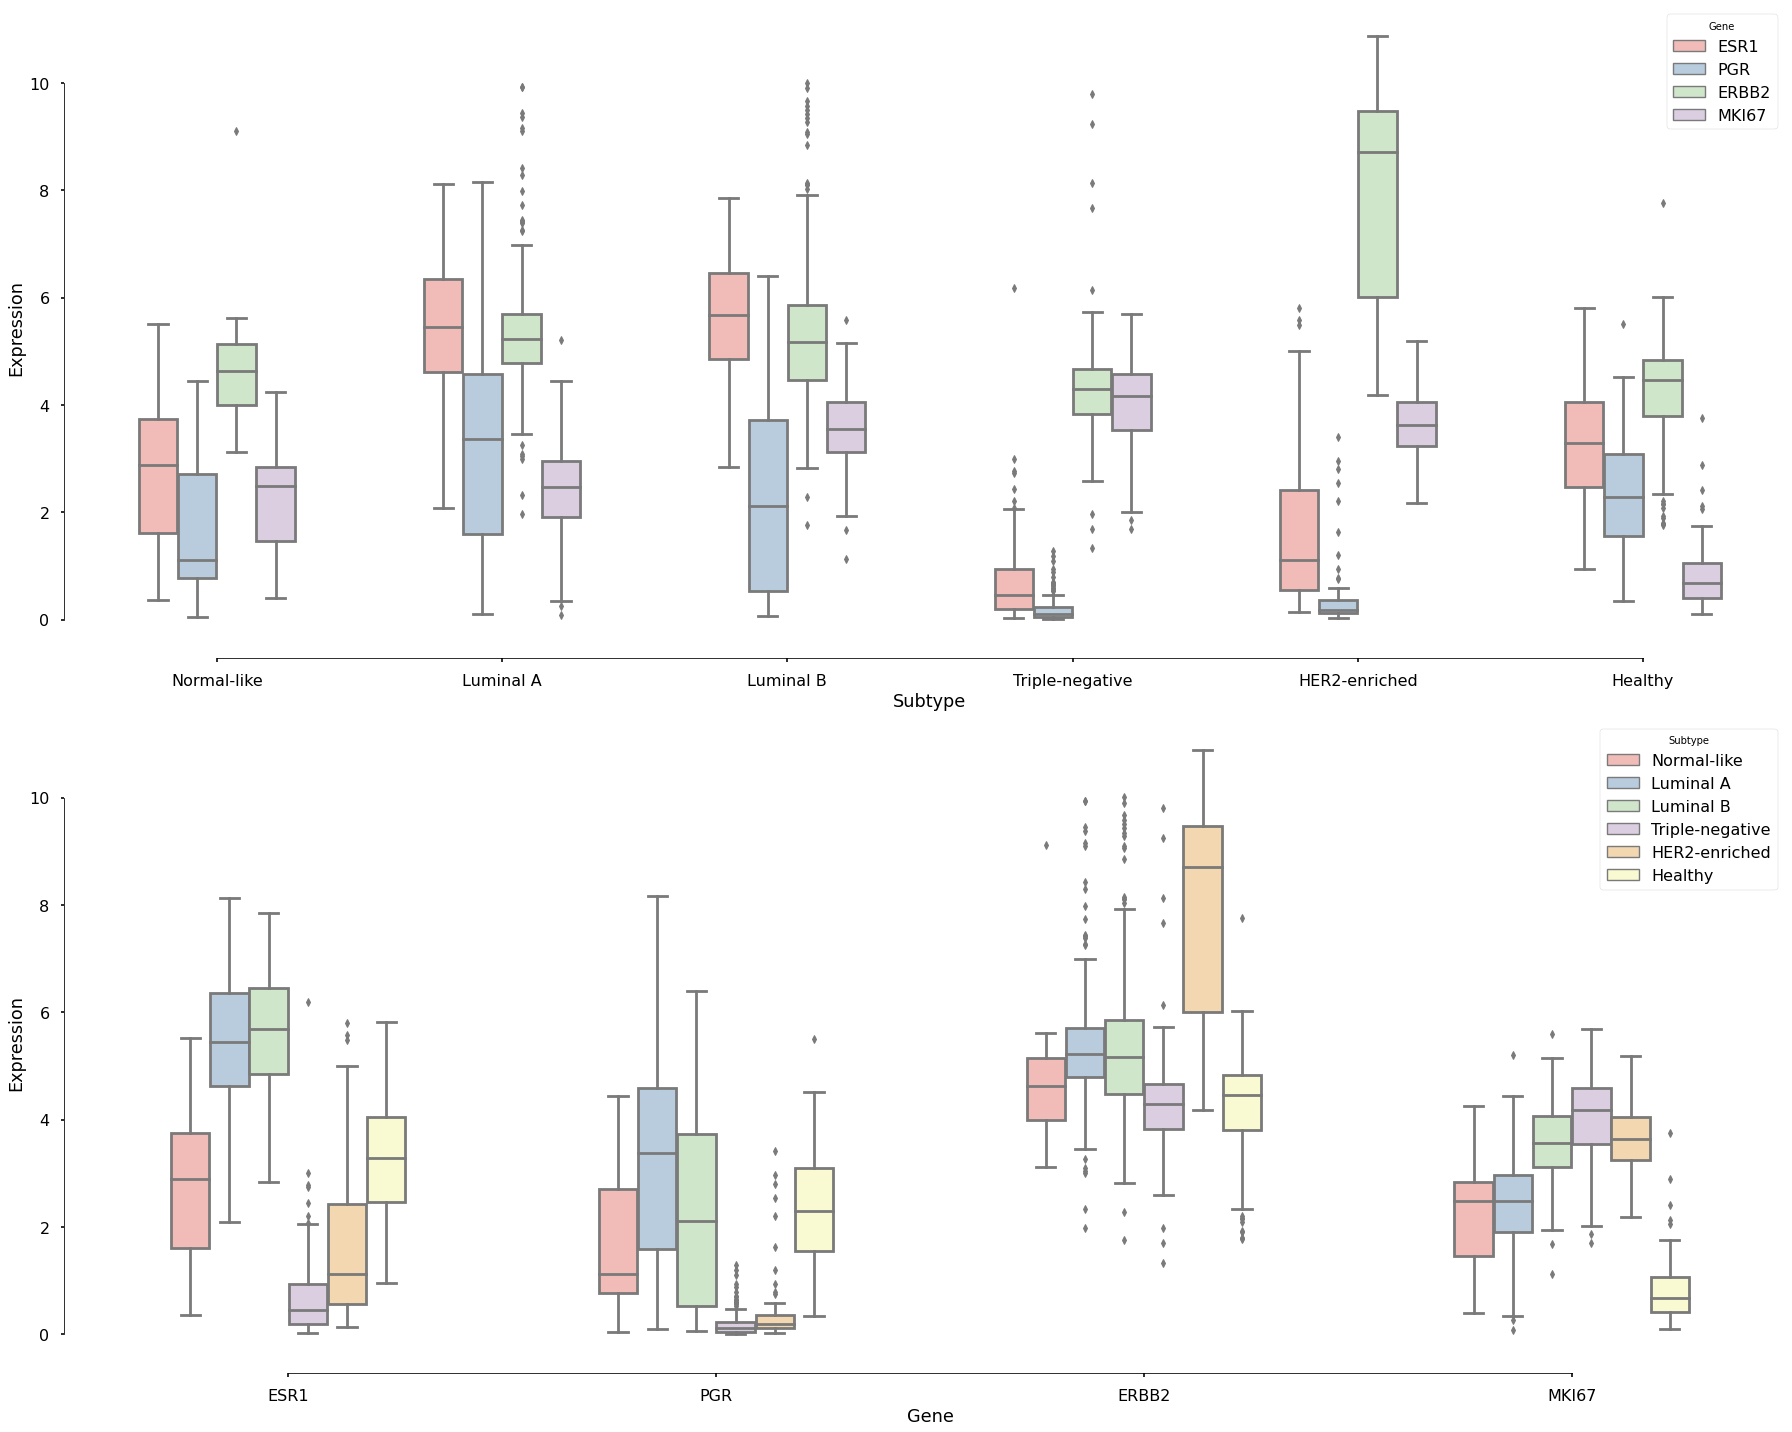

In [9]:
sns.set_palette('Pastel1')
plt.style.use('seaborn-poster')

fig, ax = plt.subplots(2, 1, figsize=(25, 20))
wid = 0.55
sns.boxplot(data=df, x='Subtype', y='Expression', hue='Gene', ax=ax[0], width=wid)
sns.boxplot(data=df, x='Gene', y='Expression', hue='Subtype', ax=ax[1], width=wid)
sns.despine(offset=10, trim=True)
plt.tight_layout()
plt.show()

# 5

In [10]:
path = 'https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar14/human_coronavirus_aln_scores.tsv'
df = pd.read_csv(path, index_col = 0, sep = '\t')

string = 'HCoV-HKU1, MERS-CoV, SARS-CoV-2, HCoV-229E, HCoV-NL63, HCoV-OC43, SARS-CoV'
names = []
[names.extend([i] * 20) for i in string.split(', ')]

df.columns = names
df.index = names

df = df ** (-1) 
df = np.log2(df / df.min().min())
df

,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,HCoV-HKU1,...,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV,SARS-CoV
HCoV-HKU1,0.000000,0.158429,0.164238,0.015666,0.015666,0.106249,0.105318,0.105318,0.103457,0.062204,...,2.257045,2.257045,2.257045,2.257045,2.257045,2.257045,2.257045,2.257045,2.257045,2.257045
HCoV-HKU1,0.158429,0.000000,0.010425,0.158429,0.158429,0.165531,0.164561,0.164561,0.162622,0.209895,...,2.341537,2.341537,2.341537,2.341537,2.341537,2.341537,2.341537,2.341537,2.341537,2.341537
HCoV-HKU1,0.164238,0.010425,0.000000,0.164238,0.164238,0.171368,0.170394,0.170394,0.168447,0.215915,...,2.356236,2.356236,2.356236,2.356236,2.356236,2.356236,2.356236,2.356236,2.356236,2.356236
HCoV-HKU1,0.015666,0.158429,0.164238,0.000000,0.000000,0.117474,0.116536,0.116536,0.114660,0.046027,...,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191
HCoV-HKU1,0.015666,0.158429,0.164238,0.000000,0.000000,0.117474,0.116536,0.116536,0.114660,0.046027,...,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191,2.296191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SARS-CoV,2.257045,2.341537,2.356236,2.296191,2.296191,2.284897,2.316169,2.316169,2.294066,2.280685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SARS-CoV,2.257045,2.341537,2.356236,2.296191,2.296191,2.284897,2.316169,2.316169,2.294066,2.280685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SARS-CoV,2.257045,2.341537,2.356236,2.296191,2.296191,2.284897,2.316169,2.316169,2.294066,2.280685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SARS-CoV,2.257045,2.341537,2.356236,2.296191,2.296191,2.284897,2.316169,2.316169,2.294066,2.280685,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


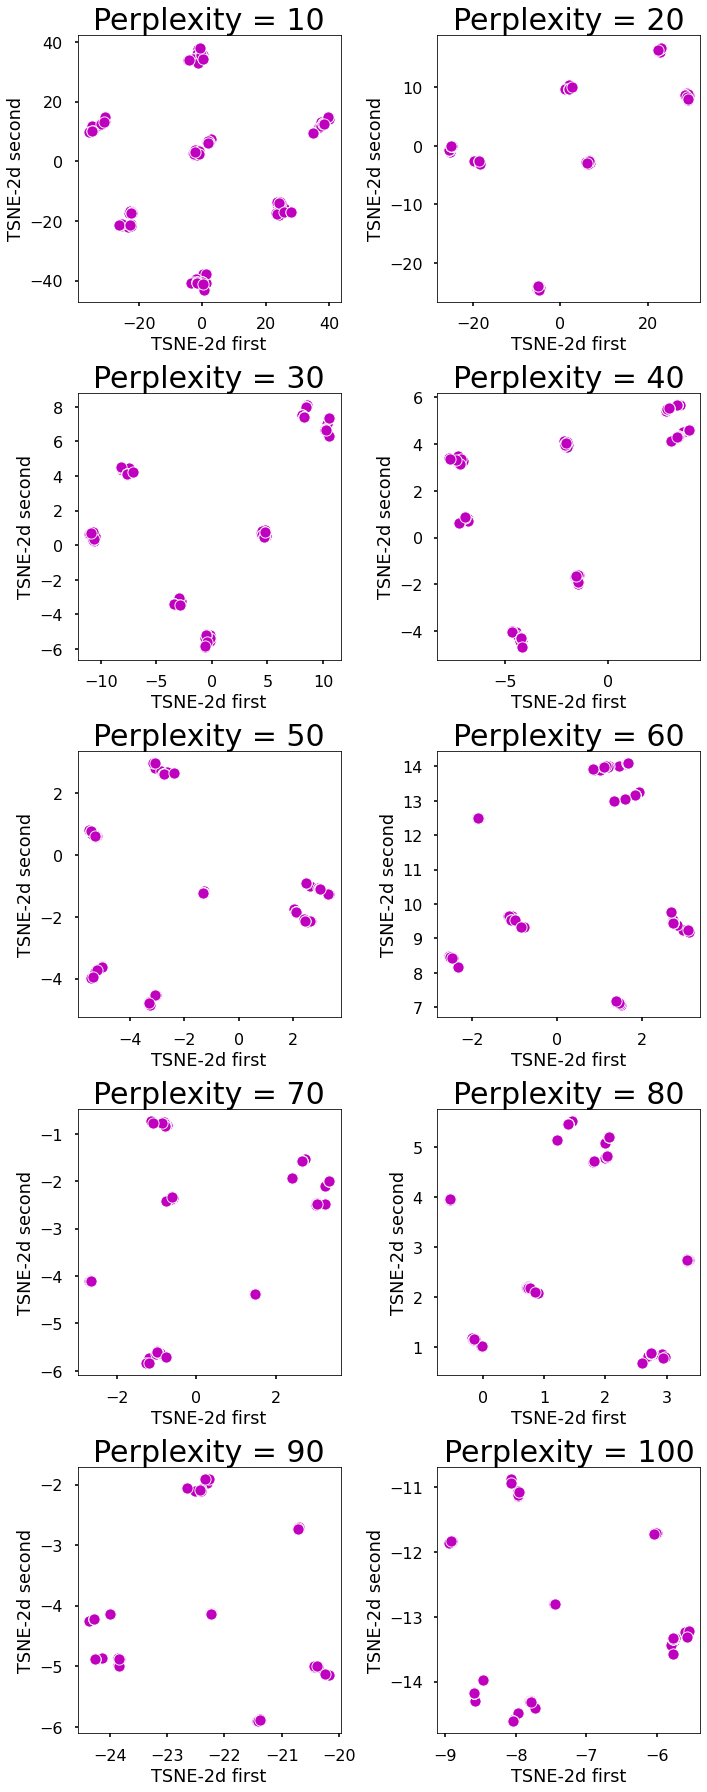

In [11]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(5, 2, figsize=(10, 25))

perpl = [i for i in range(10, 101, 10)]

axes = []
tmp = [[(i, j) for j in range(2) if j < 2] for i in range(5)]
[axes.extend(i) for i in tmp]

for i, j in zip(perpl, axes):
    res = pd.DataFrame(index=df.index)
    first = f'TSNE-2d first'
    second = f'TSNE-2d second'
    res[[first, second]] = TSNE(n_components=2,
                                perplexity=i,
                                metric='precomputed').fit_transform(df)
    

    sns.scatterplot(x=first, y=second, data=res, ax=ax[j], color=['m'])
    ax[j].set_title(f'Perplexity = {i}', size=30)

plt.tight_layout()
fig.savefig('TSNE_HW.png')
plt.show()